# Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generating data 


## Function to be fitted

In [2]:
def function(x):
  y = x*np.sin(.5*x*np.sin(.5*x*np.cos(x)))
  return y
vf = np.vectorize(function)

### Plot the function

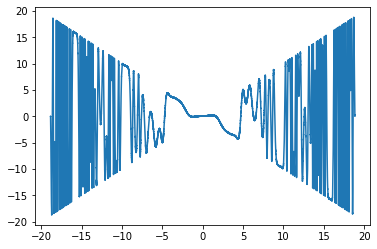

In [3]:
init = -4*np.pi
endval = 4*np.pi
step = .0005
x = np.arange(init,endval+step,step)
y = vf(x) + .1*np.random.rand(np.size(x))
plt.plot(x,y)

## Randomizing and divinding data into test and train sets

In [4]:
p = np.random.permutation(len(x)) # Create a random permutation 
x_perm = x[p]
y_perm = y[p] # Aplling same permutation on both

### Plotting to see if nothing changed (sceptical people go :D )

In [5]:
#plt.plot(x,y)
#plt.plot(x_perm,y_perm,',r')

### Train set and test set, train set is 80% of the data

In [6]:
x_train_full , x_test , y_train_full, y_test = x_perm[:int(np.floor(.8*len(x)))], x_perm[int(np.floor(.8*len(x))):], y_perm[:int(np.floor(.8*len(x)))], y_perm[int(np.floor(.8*len(x))):]

#### Since all the training data is mixed the plot is the same (except for the blank spots)

In [7]:
#plt.plot(x_train_full,y_train_full,',r')

In [8]:
#plt.plot(x_test,y_test,',b')

### Validation and training set

In [9]:
x_train, x_valid, y_train, y_valid = x_train_full[:int(np.floor(.8*len(x_train_full)))], x_train_full[int(np.floor(.8*len(x_train_full))):], y_train_full[:int(np.floor(.8*len(x_train_full)))], y_train_full[int(np.floor(.8*len(x_train_full))):]

48256


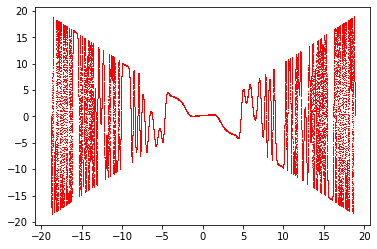

In [10]:
plt.plot(x_train,y_train,',r')
print(x_train.size)

# Making the DNN 

#### Using keras functional api to construct the the  problem
#### Unsing wide and deep neural net

In [11]:
input_ = keras.layers.Input(shape=(1,))
hidden_y = keras.layers.Dense(20, activation="tanh")(input_)
nn_layers = 10
for e_layer in range (nn_layers):
    hidden_x = keras.layers.Dense(20, activation="tanh")(hidden_y)
    #hidden_x = keras.layers.Dropout(rate=0.1)(hidden_x)
    n_layers = 2
    for layer in range(n_layers):
        hidden_x = keras.layers.Dense(10, activation="tanh")(hidden_x)
        #hidden_x = keras.layers.Dropout(rate=0.1)(hidden_x)
    concat = keras.layers.Concatenate()([input_,hidden_y,hidden_x])
    hidden_y = keras.layers.Dense(26, activation="tanh")(concat)
hidden_out_2 = keras.layers.Dense(10, activation="tanh")(hidden_y)
output = keras.layers.Dense(1)(hidden_out_2)
model = keras.Model(inputs=[input_], outputs=[output])

## Compiling the DNN

In [12]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.7, patience=5, verbose=1, min_lr=0.0001)
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
model.compile(loss="mse", optimizer=keras.optimizers.Nadam(lr=0.001))

## Seeing the DNN 

In [13]:
model.summary()

se_52[0][0]                   
                                                                 dense_55[0][0]                   
__________________________________________________________________________________________________
dense_56 (Dense)                (None, 26)           858         concatenate_13[0][0]             
__________________________________________________________________________________________________
dense_57 (Dense)                (None, 20)           540         dense_56[0][0]                   
__________________________________________________________________________________________________
dense_58 (Dense)                (None, 5)            105         dense_57[0][0]                   
__________________________________________________________________________________________________
dense_59 (Dense)                (None, 5)            30          dense_58[0][0]                   
______________________________________________________________________________

In [14]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Fitting the DNN

In [15]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  print('Found GPU at: {}'.format(device_name))
  with tf.device(device_name):
    history = model.fit(x_train,y_train, epochs=30, validation_data=(x_valid,y_valid))
else:
  history = model.fit(x_train,y_train, epochs=500, validation_data=(x_valid,y_valid),callbacks=[lr_scheduler,early_stop])

Epoch 1/500
1508/1508 [==============================] - 23s 6ms/step - loss: 59.9015 - val_loss: 56.8168
Epoch 2/500
1508/1508 [==============================] - 9s 6ms/step - loss: 56.4264 - val_loss: 57.9537
Epoch 3/500
1508/1508 [==============================] - 10s 7ms/step - loss: 56.5008 - val_loss: 54.8875
Epoch 4/500
1508/1508 [==============================] - 10s 6ms/step - loss: 54.2222 - val_loss: 54.3128
Epoch 5/500
1508/1508 [==============================] - 10s 7ms/step - loss: 53.5376 - val_loss: 51.5120
Epoch 6/500
1508/1508 [==============================] - 10s 6ms/step - loss: 51.1901 - val_loss: 48.9736
Epoch 7/500
1508/1508 [==============================] - 10s 7ms/step - loss: 50.4612 - val_loss: 53.8333
Epoch 8/500
1508/1508 [==============================] - 11s 7ms/step - loss: 50.6988 - val_loss: 49.9892
Epoch 9/500
1508/1508 [==============================] - 9s 6ms/step - loss: 47.6465 - val_loss: 47.2919
Epoch 10/500
1508/1508 [========================

KeyboardInterrupt: 

In [16]:
mse_test = model.evaluate(x_test, y_test)

315/315 [==============================] - 0s 657us/step - loss: 0.0956


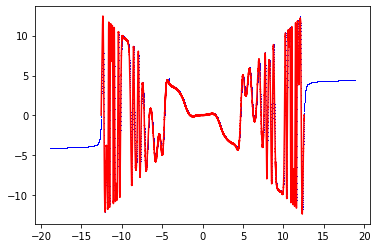

In [19]:
x_new = np.arange(-10*np.pi,10*np.pi+step*10,step*10)
y_new = model.predict(x_new)
plt.plot(x_new,y_new,',b')
plt.plot(x,y,'r')